In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

----------ETL + ANALISE PRATICA----------

In [2]:
data = r'../PYTHON/pneumologista_joao_pacientes.csv'
df = pd.read_csv(data)


In [3]:
df['saturacao_oxigenio'] = df['saturacao_oxigenio'].fillna(df['saturacao_oxigenio'].median())
df['peso_kg'] = df['peso_kg'].fillna(df['peso_kg'].median())
df['altura_m'] = df['altura_m'].fillna(df['altura_m'].median())

# TRATANDO VALORES NULOS
# POR SER UMA COLUNA NUMERICA EU PREFERI PREENCHER COM A MEDIANA


In [4]:
df['sexo'] = df['sexo'].str.lower().str.strip()
df['sexo'] = df['sexo'].replace({
    'm': 'masculino', 'masc': 'masculino', 'male': 'masculino',
    'f': 'feminino', 'fem': 'feminino', 'female': 'feminino'
})

df['sexo'] = df['sexo'].fillna('desconhecido')

# TRATANDO A COLUNA SEXO
# ACREDITO QUE 'OUTROS' 'NÃO DECLARADO' etc SAO CONSIDERADOS UMA CATEGORIA(RELEVANTE)

In [5]:
df['imc'] = df['peso_kg'] / (df['altura_m'] ** 2)

In [6]:
#df.to_csv('pneumologista_joao_pacientes_limpo.csv', index=False)

----------MATPLOTLIB----------

In [7]:
imc_media = np.mean(df['imc'])
imc_desvio = np.std(df['imc'])

print(f'IMC Médio: {imc_media:.2f}, Desvio Padrão: {imc_desvio:.2f}')

# USANDO NUMPY PARA CALCULAR A MEDIA E DESVIO 

IMC Médio: 27.14, Desvio Padrão: 6.10


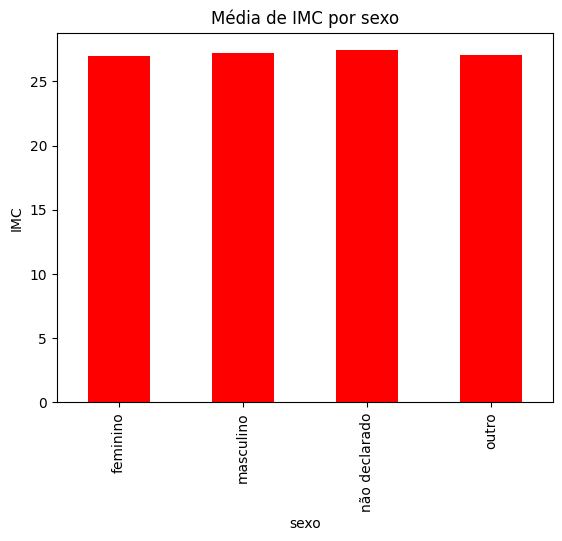

In [8]:
media_imc_sexo = df.groupby('sexo')['imc'].mean()
media_imc_sexo.plot(kind='bar', color='red', title='Média de IMC por sexo')
plt.ylabel('IMC')
plt.show()

# GRAFICO DE BARRA

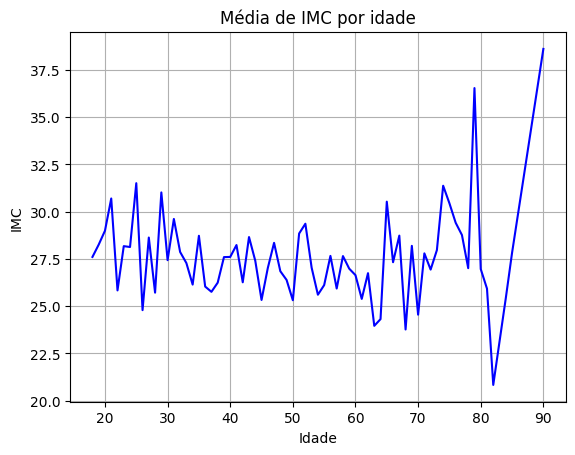

In [9]:
media_imc_idade = df.groupby('idade')['imc'].mean()
media_imc_idade.plot(kind='line', color='blue', title='Média de IMC por idade')
plt.ylabel('IMC')
plt.xlabel('Idade')
plt.grid(True)
plt.show()

In [14]:
np.random.seed(42)
df['risco_cancer'] = np.random.choice([0, 1], size=len(df))


X = df[['idade', 'peso_kg', 'altura_m', 'saturacao_oxigenio', 'imc', 'sexo']]
y = df['risco_cancer']

preprocessor = ColumnTransformer(
    transformers=[
        ('sexo', OneHotEncoder(drop='first'), ['sexo'])
    ],
    remainder='passthrough'  
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)


print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Matriz de Confusão:
[[43 52]
 [40 65]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.52      0.45      0.48        95
           1       0.56      0.62      0.59       105

    accuracy                           0.54       200
   macro avg       0.54      0.54      0.53       200
weighted avg       0.54      0.54      0.54       200



c:\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
